In [1]:
import numpy as np
from math import pi
from matplotlib import pyplot as plt

class Vehicle:
    def __init__(self):
        self.x       = 0 # meters
        self.y       = 0
        self.heading = "E" # Can be "N", "S", "E", or "W"
        self.history = []
        
    def drive_forward(self, displacement):
        """
        Updates x and y coordinates of vehicle based on 
        heading and appends previous (x,y) position to
        history.
        """
        
        # east
        if self.heading == "E":
            delta_x = displacement 
            delta_y = 0
        
        # north
        elif self.heading == "N":
            delta_x = 0 
            delta_y = displacement
        
        # west
        elif self.heading == "W":
            delta_x = -displacement
            delta_y = 0
        
        # south
        else:
            delta_x = 0 
            delta_y = -displacement
            
        new_x = self.x + delta_x
        new_y = self.y + delta_y
        
        self.history.append((self.x, self.y))

        self.x = new_x
        self.y = new_y
        
    def turn(self, direction):
        if direction == "L":
            self.turn_left()
        elif direction == "R":
            self.turn_right()
        else:
            print("Error. Direction must be 'L' or 'R'")
            return
        
    def turn_left(self):
        next_heading = {
            "N" : "W",
            "W" : "S",
            "S" : "E",
            "E" : "N",
        }
        self.heading = next_heading[self.heading]
        
    def turn_right(self):
        next_heading = {
            "N" : "E",
            "W" : "N",
            "S" : "W",
            "E" : "S",
        }
        self.heading = next_heading[self.heading]
    
    def show_trajectory(self):
        """
        Creates a scatter plot of vehicle's trajectory.
        """
        X = [p[0] for p in self.history]
        Y = [p[1] for p in self.history]
        
        X.append(self.x)
        Y.append(self.y)
        
        plt.scatter(X,Y)
        plt.plot(X,Y)
        plt.show()

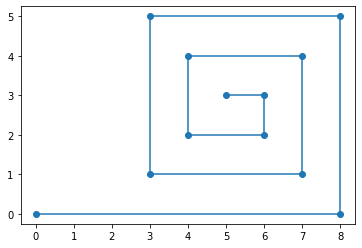

Nice job! Your vehicle is behaving as expected!


In [2]:
# TESTING CODE 1

# instantiate vehicle
v = Vehicle()

# drive in spirals of decreasing size
v.drive_forward(8)
v.turn("L")

v.drive_forward(5)
v.turn("L")

v.drive_forward(5)
v.turn("L")

v.drive_forward(4)
v.turn("L")

v.drive_forward(4)
v.turn("L")

v.drive_forward(3)
v.turn("L")

v.drive_forward(3)
v.turn("L")

v.drive_forward(2)
v.turn("L")

v.drive_forward(2)
v.turn("L")

v.drive_forward(1)
v.turn("L")

v.drive_forward(1)

# show the trajectory. It should look like a spiral
v.show_trajectory()

# TESTING
assert(v.x == 5)
assert(v.y == 3)
first_5 = [
    (0, 0),
    (8, 0),
    (8, 5),
    (3, 5),
    (3, 1)
]
assert(first_5 == v.history[:5])
print("Nice job! Your vehicle is behaving as expected!")

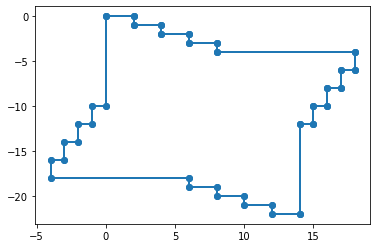

Nice job! Your vehicle passed the zig zag test.


In [3]:
# TESTING CODE Part 2
def test_zig_zag():
    v = Vehicle()
    for i in range(10):
        for _ in range(4):
            v.drive_forward(2)
            v.turn("R")
            v.drive_forward(1)
            v.turn("L")
        v.drive_forward(10)
        v.turn("R")
    first_six = [
        (0,0),
        (2,0),
        (2,-1),
        (4,-1),
        (4,-2),
        (6,-2)
    ]
    v.show_trajectory()
    assert(v.x == 14)
    assert(v.y == -22)
    assert(v.history[:6] == first_six)
    print("Nice job! Your vehicle passed the zig zag test.")
test_zig_zag()


In [24]:
# Python's math module has functions called sin, cos, and tan
# as well as the constant "pi" (which we will find useful shortly)
from math import sin, cos, tan, pi

# Run this cell. What do you expect the output to be?
print(sin(60))

-0.3048106211022167


In [26]:
from math import pi
def deg2rad(theta):
    """Converts degrees to radians"""
    # TODO - implement this function (solution
    #    code at end of notebook)
    return (theta*pi/180)

assert(deg2rad(45.0) == pi / 4)
assert(deg2rad(90.0) == pi / 2)
print("Nice work! Your degrees to radians function works!")

for theta in [0, 30, 45, 60, 90]:
    theta_rad = deg2rad(theta)
    sin_theta = sin(theta_rad)
    print("sin(", theta, "degrees) =", sin_theta)

Nice work! Your degrees to radians function works!
sin( 0 degrees) = 0.0
sin( 30 degrees) = 0.49999999999999994
sin( 45 degrees) = 0.7071067811865476
sin( 60 degrees) = 0.8660254037844386
sin( 90 degrees) = 1.0


In [27]:
import numpy as np
from matplotlib import pyplot as plt
def plot_sine(min_theta, max_theta):
    """
    Generates a plot of sin(theta) between min_theta
    and max_theta (both of which are specified in degrees).
    """
    angles_degrees = np.linspace(min_theta, max_theta)
    angles_radians = deg2rad(angles_degrees)
    values = np.sin(angles_radians)
    X = angles_degrees
    Y = values
    plt.plot(X,Y)
    plt.show()
    
# EXERCISE 2.1 Implement this! Try not to look at the
#  implementation of plot_sine TOO much...
def plot_cosine(min_theta, max_theta):
    """
    Generates a plot of sin(theta) between min_theta
    and max_theta (both of which are specified in degrees).
    """
    angles_degrees = np.linspace(min_theta, max_theta)
    angles_radians = deg2rad(angles_degrees)
    values = np.cos(angles_radians)
    X = angles_degrees
    Y = values
    plt.plot(X,Y)
    plt.show()

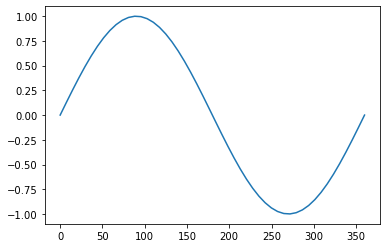

In [28]:
plot_sine(0, 360)

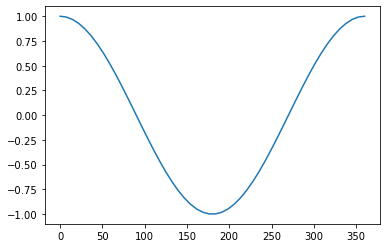

In [29]:
plot_cosine(0, 360)

In [30]:
import numpy as np
from math import sin, cos, pi
from matplotlib import pyplot as plt

# TODO - Complete the methods in the vehicle class. If the 
#        requirements of any method are unclear, look at 
#        the testing code in testing.py (you'll need to
#        click on the "Jupyter" logo in the top left and
#        then open testing.py)
#
#        If you really get stuck, take a look at the 
#        solution code in the next segment.

class Vehicle:
    def __init__(self):
        self.x       = 0.0 # meters
        self.y       = 0.0
        self.heading = 0.0 # radians
        self.history = []
        self.history.append((self.x, self.y))
        
    def drive_forward(self, displacement):
        """
        Updates x and y coordinates of vehicle based on 
        heading and appends previous (x,y) position to
        history.
        """
        self.x += cos(self.heading)*displacement
        self.y += sin(self.heading)*displacement
        self.history.append((self.x, self.y))
    
    def set_heading(self, heading_in_degrees):
        """
        Sets the current heading (in radians) to a new value
        based on heading_in_degrees. Vehicle heading is always
        between 0 and 2 * pi.
        """
        self.heading = heading_in_degrees*pi/180
    
    def turn(self, angle_in_degrees):
        """
        Changes the vehicle's heading by angle_in_degrees. Vehicle 
        heading is always between 0 and 2 * pi.
        """
        self.heading += angle_in_degrees*pi/180
    
    def show_trajectory(self):
        """
        Creates a scatter plot of vehicle's trajectory.
        """
        X = [p[0] for p in self.history]
        Y = [p[1] for p in self.history]
        
        X.append(self.x)
        Y.append(self.y)
        
        plt.scatter(X,Y)
        plt.plot(X,Y)
        plt.show()

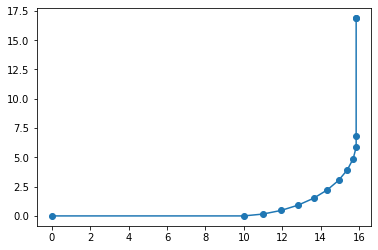

In [31]:
# You'll have to "test" your show_trajectory method 
# visually. Run the code below and see if the plot that's
# produced looks similar to the plot at the bottom of 
# this notebook.

# instantiate vehicle
v = Vehicle()

# drive forward 10 meters
v.drive_forward(10)

# turn left in 10 increments of 9 degrees each.
for _ in range(10):
    v.turn(9.0)
    v.drive_forward(1)

v.drive_forward(10)

v.show_trajectory()